In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
df=pd.read_excel("Xiaomi India Case.xlsx")

In [3]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1,Monday,Chrome,13,4,8.5,2668.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Saturday,Chrome,15,5,16.9,3469.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Monday,Internet Explorer,20,6,7.3,5215.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Monday,Chrome,42,6,30.1,10423.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns


Index(['Customer', 'Day', 'Browser', 'No. of Clicks', 'Pages Viewed',
       'Time (min)', 'Amount Spent (Rs.)', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 7', 'Unnamed: 8','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],axis=1,inplace=True)

In [6]:
df.head

<bound method NDFrame.head of        Customer        Day            Browser  No. of Clicks  Pages Viewed  \
0             1     Monday             Chrome             13             4   
1             2   Saturday             Chrome             15             5   
2             3     Monday  Internet Explorer             20             6   
3             4     Monday             Chrome             42             6   
4             5   Saturday  Internet Explorer             20             6   
...         ...        ...                ...            ...           ...   
43195     43196     Friday             Chrome             31             3   
43196     43197     Monday             Chrome             13             4   
43197     43198     Friday            Firefox             29            10   
43198     43199     Monday  Internet Explorer             20             6   
43199     43200  Wednesday             Chrome             29             4   

       Time (min)  Amount Spent (

In [7]:
df['Day'] = df['Day'].replace({1:'Monday', 2:'Tuesday', 3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

In [8]:
df['Day'].value_counts()

Friday       9504
Monday       7776
Saturday     6048
Tuesday      6048
Wednesday    5184
Thursday     4320
Sunday       4320
Name: Day, dtype: int64

In [9]:
df.Browser.value_counts()

Chrome               23328
Firefox              13824
Internet Explorer     6048
Name: Browser, dtype: int64

In [10]:
df['Browser']=df['Browser'].replace({1:'Chrome',2:'Firefox',3:'Internet Explorer'})

In [11]:
df.Browser.value_counts()

Chrome               23328
Firefox              13824
Internet Explorer     6048
Name: Browser, dtype: int64

In [12]:
df.head()

,Customer,Day,Browser,No. of Clicks,Pages Viewed,Time (min),Amount Spent (Rs.)
0,1,Monday,Chrome,13,4,8.5,2668.0
1,2,Saturday,Chrome,15,5,16.9,3469.0
2,3,Monday,Internet Explorer,20,6,7.3,5215.0
3,4,Monday,Chrome,42,6,30.1,10423.0
4,5,Saturday,Internet Explorer,20,6,13.3,5404.0


In [13]:
df = pd.get_dummies(df, columns = ['Day'])
df = pd.get_dummies(df, columns = ['Browser'])

In [14]:
df.isnull().sum()

Customer                     0
No. of Clicks                0
Pages Viewed                 0
Time (min)                   0
Amount Spent (Rs.)           0
Day_Friday                   0
Day_Monday                   0
Day_Saturday                 0
Day_Sunday                   0
Day_Thursday                 0
Day_Tuesday                  0
Day_Wednesday                0
Browser_Chrome               0
Browser_Firefox              0
Browser_Internet Explorer    0
dtype: int64

<AxesSubplot:>

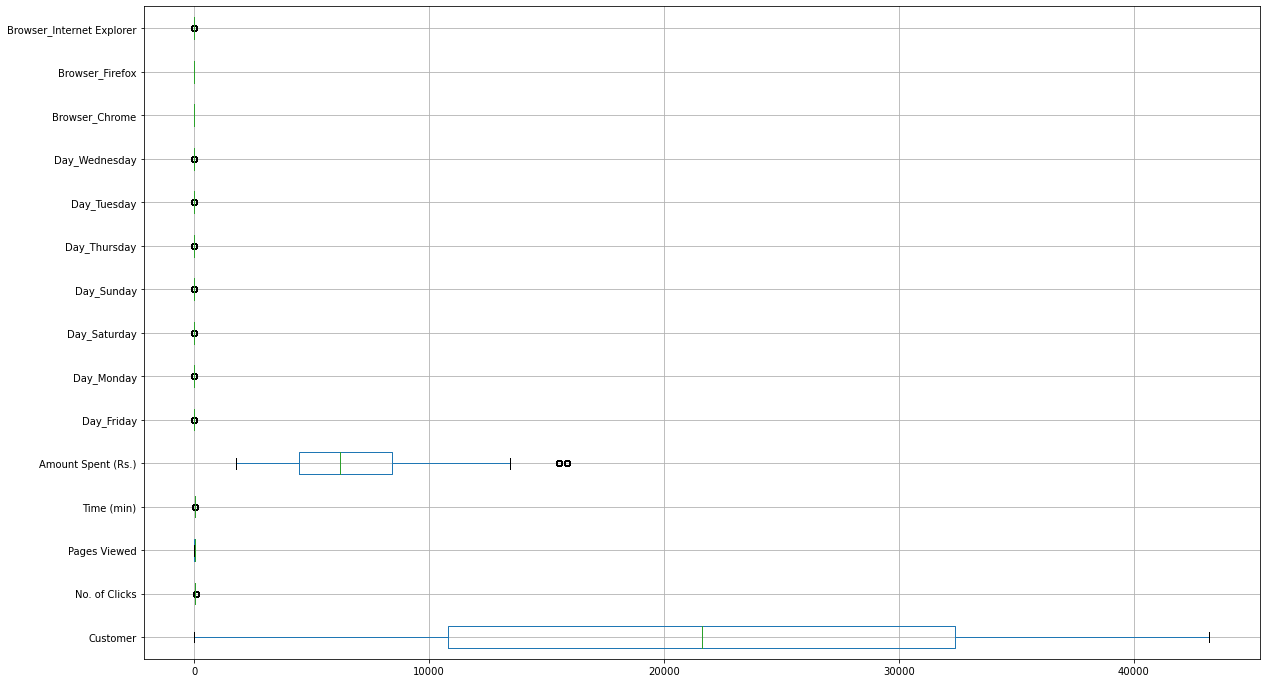

In [15]:
plt.figure(figsize = (20,12))
df.boxplot(vert = 0)

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
for column in df.columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

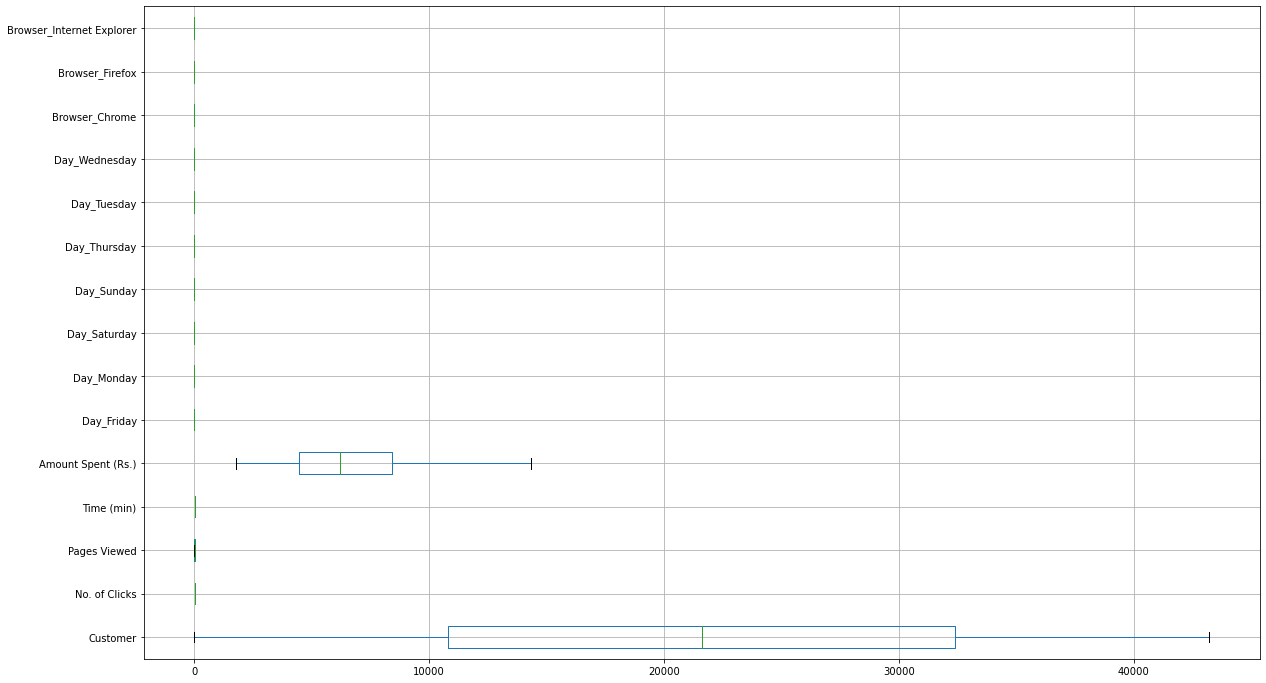

In [18]:
plt.figure(figsize = (20,12))
df.boxplot(vert = 0)

## Linear Regression

In [19]:
df.columns

Index(['Customer', 'No. of Clicks', 'Pages Viewed', 'Time (min)',
       'Amount Spent (Rs.)', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday',
       'Browser_Chrome', 'Browser_Firefox', 'Browser_Internet Explorer'],
      dtype='object')

In [20]:
x = df.drop(columns = ['Amount Spent (Rs.)'], axis = 1)

In [1]:
x.head()

NameError: name 'x' is not defined

In [22]:
y = df[["Amount Spent (Rs.)"]]

In [23]:
y.head()

,Amount Spent (Rs.)
0,2668.0
1,3469.0
2,5215.0
3,10423.0
4,5404.0


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 60)
lr_model = LinearRegression()

In [25]:
lr_model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr_model.predict(x_test)

In [27]:
r2_score(y_test,y_pred)

0.8895233353001842

In [28]:
mse=mean_squared_error(y_test,y_pred)
mse

1016858.6730507027

In [29]:
rmse = np.sqrt(mse)
rmse

1008.3941060174353

### Cross validation 

In [30]:
score=cross_val_score(estimator=lr_model,X=x,y=y,cv=10)

In [31]:
np.mean(score)

0.8927654195972675

## Lasso Regression

In [32]:
ls=Lasso()

In [33]:
ls.fit(x_train,y_train)

Lasso()

In [34]:
ls_pred=ls.predict(x_test)

In [35]:
r2_score(y_test,ls_pred)

0.8895205723183506

In [36]:
mse=mean_squared_error(y_test,ls_pred)

In [37]:
rmse=np.sqrt(mse)
rmse

1008.4067157263888

## Ridge Regression

In [38]:
rg=Ridge()

In [39]:
rg.fit(x_train,y_train)

Ridge()

In [40]:
rg_pred=rg.predict(x_test)

In [41]:
r2_score(y_test,rg_pred)

0.8895233293676131

In [42]:
mse1=mean_squared_error(y_test,rg_pred)
mse1

1016858.7276557758

In [43]:
rmse=np.sqrt(mse1)
rmse

1008.3941330926989

### Gridsearch with cv

In [44]:
param_rd={"alpha":[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120]}
param_ls={"alpha":[1e-15,1e-13,1e-11,1e-9,1e-7,1e-5,1e-3,1e-1,0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,110,120]}

In [45]:
rg=Ridge()
model_rg=GridSearchCV(rg,param_rd,cv=10)

In [46]:
model_rg.fit(x,y)

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.04175e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78113e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62551e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53605e-28): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49491e-28): result may not be accurate

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78113e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62551e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.53605e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49491e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.49491e-20): result may not be accurate

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-11, 1e-09, 1e-07, 1e-05,
                                   0.001, 0.1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   20, 30, 40, 50, 60, 70, 80, 90, 100, 110,
                                   120]})

In [47]:
model_rg.best_params_

{'alpha': 30}

In [48]:
rg1=Ridge(alpha=30)
rg1.fit(x_train,y_train)
rg_pred1=rg1.predict(x_test)


In [49]:
r2_score(y_test,rg_pred1)

0.8895230716250572

### Gridsearch lasso

In [50]:
model_ls=GridSearchCV(ls,param_ls,cv=10)

In [51]:
model_ls.fit(x,y)

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19440830484.626762, tolerance: 36367191.92041054
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19472379865.04013, tolerance: 36296466.87431984
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19405375914.61469, tolerance: 36334872.53281891
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarni

C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19405997185.530296, tolerance: 36334872.53281891
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\nitin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-11, 1e-09, 1e-07, 1e-05,
                                   0.001, 0.1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                   20, 30, 40, 50, 60, 70, 80, 90, 100, 110,
                                   120]})

In [52]:
model_ls.best_params_

{'alpha': 0.001}

In [53]:
ls1=Lasso(alpha=0.001)
ls1.fit(x_train,y_train)
ls_pred1=ls1.predict(x_test)

In [54]:
r2_score(y_test,ls_pred1)

0.8895233370525801

In [55]:
mean_squared_error(y_test,ls_pred1)

1016858.6569211516

## Decision Tree Regressor

In [56]:
dt = DecisionTreeRegressor()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [58]:
dt_pred=dt.predict(x_test)

In [59]:
r2_score(y_test,dt_pred)

1.0

In [60]:
mse=mean_squared_error(y_test,dt_pred)
mse

2.2947320957326832e-26

In [61]:
rmse=np.sqrt(mse)
rmse

1.5148373165897001e-13

In [62]:
score2=cross_val_score(estimator=dt,X=x,y=y,cv=10)

In [63]:
np.mean(score2)

1.0